# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Văn Lê Bá Thành
- Student ID: 22127390
- Class: 22CLC08

## Required Libraries

In [6]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

## Function Definitions

In [7]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    raw_image = Image.open(img_path)
    return raw_image

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img.save(img_path)


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def perform_brightness(img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''
    
    # Input brightness
    brightness = input('Enter brightness [-255:255]: ')

    # Perform brightness adjustment
    result = np.uint8(np.clip(img + np.array([brightness], dtype=np.int16), 0, 255))

    # Create result_path for output image
    result_path = img_name + "_brightness" + format

    # Convert np.array to Image object
    img_result = Image.fromarray(result)

    # Show and save image
    show_img(result)
    save_img(img_result, result_path)

def perform_Contrast (img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    contrast = input('Enter contrast [-255:255]: ')

    # Check and replace contrast if exceed [-255:255]
    contrast = np.clip(float(contrast), -255, 255)

    # Calculate factor between dark and bright color
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    
    # Perform contrast adjustment
    result = np.uint8(np.clip(factor * (img_2d.astype(float) - 128) + 128, 0, 255))

    # Create result_path for output image
    result_path = result_path + img_name + "_contrast" + format

    # Convert np.array to Image object
    img_result = Image.fromarray(np.uint8(result))

    # Show and save image
    show_img(result)
    save_img(img_result, result_path)

def flip(img, direction):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    direction : str
        Direction for flipping (vertical or horizontal)

    '''

    if direction == 'vertical':
        return np.flipud(img)
    elif direction == 'horizontal':
        return np.fliplr(img)

def perform_flip(img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    for direction in range(1, 3):
        if direction == '1':
            direction = 'vertical'
        elif direction == '2':
            direction = 'horizontal'
        result = flip(img, direction)
        result_path = img_name + "_flip" + "_" + str(direction) + format
        img_result = Image.fromarray(np.uint8(result))
        show_img(result)
        save_img(img_result, result_path)

def perform_grayscale (img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    weight = np.array([0.299, 0.587, 0.114])
    result = np.uint8(np.dot(img[..., :3], weight))
    result_path = img_name + "_grayscale" + format
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

def perform_sephia (img, img_name, format):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    img_name : str
        Name of Image

    format : str
        Format of Image

    '''

    weight = np.array([[0.393, 0.769, 0.189], 
                       [0.349, 0.686, 0.168], 
                       [0.272, 0.534, 0.131]])
    
    print(weight.shape)
    img_float = img.astype(np.float32)
    
    # Apply the sepia filter
    result = np.dot(img_float[..., :3], weight.T)
    result = np.clip(result, 0, 255).astype(np.uint8)
    print(result.shape)

    result_path = img_name + "_sephia" + format
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [8]:
# YOUR CODE HERE

## Main FUNCTION

In [9]:
def main():
    print("Enter image path: ")
    img_path = input()

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray

    # Show original Image
    show_img(raw_img)

    # Perform brightness adjustment
    #perform_brightness(pic, img_name, format)

    # Perform sephia adjustment
    perform_sephia(raw_img, img_name, format)    
    #perform_flip(pic, result_path, img_name, format)
    #perform_grayscale(pic, result_path, img_name, format)
    #perform_blend(pic, result_path, img_name, format)

Enter image path: 
(3, 3)
(512, 512, 3)


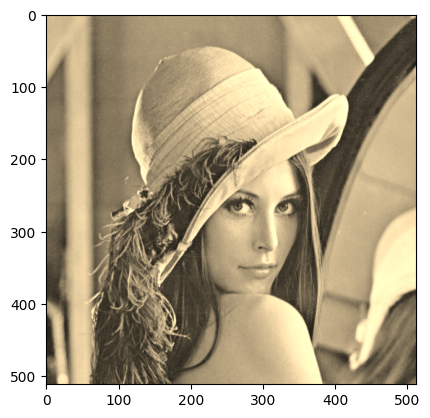

In [10]:
# Call main function
main()